In [13]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [19]:
wd = os.getcwd()

df = pd.read_excel(wd+'\\Data\\'+'WTI.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df.set_index('Date', inplace=True)
df

,PX_LAST,PX_VOLUME
Date,,
10-29-2021,83.57,485727.0
10-28-2021,82.81,491585.0
10-27-2021,82.66,529952.0
10-26-2021,84.65,467716.0
10-25-2021,83.76,568725.0
...,...,...
08-01-1990,21.62,38007.0
05-01-1990,23.08,50.0
04-01-1990,23.41,2500.0


In [41]:
xlsx_files = glob.glob(os.path.join(wd, 'Data',"*.xlsx"))
for f in xlsx_files:
    data_name = f.split("\\")[-1].split('.')[0]
    data_name = data_name.replace(" ", "_")
    
    if data_name == 'WTI': continue

    df_temp = pd.read_excel(f)
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])
    df_temp['Date'] = df_temp['Date'].dt.strftime('%m-%d-%Y')
    df_temp.set_index('Date', inplace=True)
    
    df[df_temp.columns[0] + '_' + data_name] = df_temp[df_temp.columns[0]]
    
df.fillna(method='bfill', inplace=True)
df


,PX_LAST,PX_VOLUME,PX_LAST_Canada_daily_prod,PX_LAST_Cass_Freight_Rates,PX_LAST_China_GDP,PX_LAST_DAX,PX_LAST_DowJones,PX_LAST_Europe_Inflation,PX_LAST_Europe_IndProd_exConstruction,PX_LAST_Germany_GDP,...,PX_LAST_OPEC_daily_prod,PX_LAST_Russia_GDP,PX_LAST_Russia_Industrial_Production,PX_LAST_Russia_daily_prod,PX_LAST_SPX,PX_LAST_US_GDP,PX_LAST_US_Inflation,PX_LAST_USDEUR,PX_LAST_US_daily_prod,PX_LAST_US_IndProd_Index
Date,,,,,,,,,,,,,,,,,,,,,
10-29-2021,83.57,485727.0,4121.0,1.184,4.9,15688.77,35819.56,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4605.38,9.6,5.4,0.8650,11230.181,100.0178
10-28-2021,82.81,491585.0,4121.0,1.184,4.9,15696.33,35730.48,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4596.42,9.6,5.4,0.8559,11230.181,100.0178
10-27-2021,82.66,529952.0,4121.0,1.184,4.9,15705.81,35490.69,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4551.68,9.6,5.4,0.8618,11230.181,100.0178
10-26-2021,84.65,467716.0,4121.0,1.184,4.9,15757.06,35756.88,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4574.79,9.6,5.4,0.8623,11230.181,100.0178
10-25-2021,83.76,568725.0,4121.0,1.184,4.9,15599.23,35741.15,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4566.48,9.6,5.4,0.8613,11230.181,100.0178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-01-1990,21.62,38007.0,NaN,NaN,NaN,1892.89,2899.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,355.52,NaN,NaN,0.7566,NaN,NaN
05-01-1990,23.08,50.0,NaN,NaN,NaN,1787.87,2668.92,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,332.25,NaN,NaN,0.8003,NaN,NaN
04-01-1990,23.41,2500.0,NaN,NaN,NaN,1787.87,2635.59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,332.74,NaN,NaN,0.8175,NaN,NaN


In [45]:
df_t = df.copy()
df_t = df_t.dropna()
df_t.head()

,PX_LAST,PX_VOLUME,PX_LAST_Canada_daily_prod,PX_LAST_Cass_Freight_Rates,PX_LAST_China_GDP,PX_LAST_DAX,PX_LAST_DowJones,PX_LAST_Europe_Inflation,PX_LAST_Europe_IndProd_exConstruction,PX_LAST_Germany_GDP,...,PX_LAST_OPEC_daily_prod,PX_LAST_Russia_GDP,PX_LAST_Russia_Industrial_Production,PX_LAST_Russia_daily_prod,PX_LAST_SPX,PX_LAST_US_GDP,PX_LAST_US_Inflation,PX_LAST_USDEUR,PX_LAST_US_daily_prod,PX_LAST_US_IndProd_Index
Date,,,,,,,,,,,,,,,,,,,,,
10-29-2021,83.57,485727.0,4121.0,1.184,4.9,15688.77,35819.56,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4605.38,9.6,5.4,0.8650,11230.181,100.0178
10-28-2021,82.81,491585.0,4121.0,1.184,4.9,15696.33,35730.48,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4596.42,9.6,5.4,0.8559,11230.181,100.0178
10-27-2021,82.66,529952.0,4121.0,1.184,4.9,15705.81,35490.69,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4551.68,9.6,5.4,0.8618,11230.181,100.0178
10-26-2021,84.65,467716.0,4121.0,1.184,4.9,15757.06,35756.88,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4574.79,9.6,5.4,0.8623,11230.181,100.0178
10-25-2021,83.76,568725.0,4121.0,1.184,4.9,15599.23,35741.15,3.4,101.9,2.5,...,27490.0,10.5,6.8,10072.497,4566.48,9.6,5.4,0.8613,11230.181,100.0178


c:\users\joel\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Price')

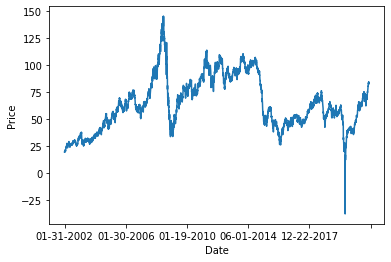

In [88]:
ax = df_t[df_t.columns[0]][::-1].plot()
ax.set_ylabel("Price")

c:\users\joel\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'PX_LAST'}>,
        <AxesSubplot:title={'center':'PX_LAST_Canada_daily_prod'}>,
        <AxesSubplot:title={'center':'PX_LAST_Cass_Freight_Rates'}>,
        <AxesSubplot:title={'center':'PX_LAST_China_GDP'}>,
        <AxesSubplot:title={'center':'PX_LAST_DAX'}>],
       [<AxesSubplot:title={'center':'PX_LAST_DowJones'}>,
        <AxesSubplot:title={'center':'PX_LAST_Europe_IndProd_exConstruction'}>,
        <AxesSubplot:title={'center':'PX_LAST_Europe_Inflation'}>,
        <AxesSubplot:title={'center':'PX_LAST_Germany_GDP'}>,
        <AxesSubplot:title={'center':'PX_LAST_HangSeng'}>],
       [<AxesSubplot:title={'center':'PX_LAST_Japan_GDP'}>,
        <AxesSubplot:title={'center':'PX_LAST_NG1'}>,
        <AxesSubplot:title={'center':'PX_LAST_Nikkei'}>,
        <AxesSubplot:title={'center':'PX_LAST_OPEC_daily_prod'}>,
        <AxesSubplot:title={'center':'PX_LAST_Russia_GDP'}>],
       [<AxesSubplot:title={'center':'PX_LAST_Russia_Industrial_Product

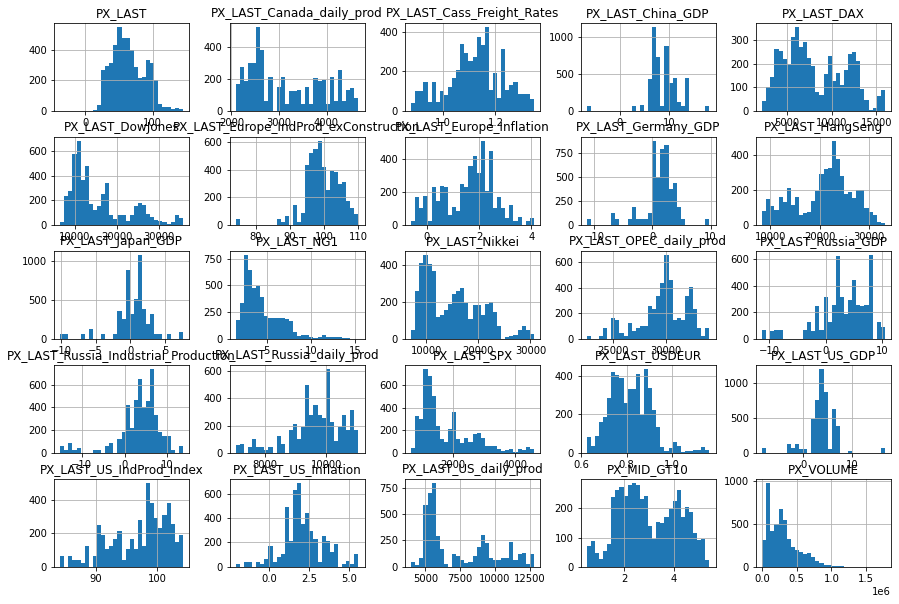

In [89]:
df_t.hist(bins=30, figsize=(15, 10))

Date
10-29-2021    0.009178
10-28-2021    0.001815
10-27-2021   -0.023509
10-26-2021    0.010626
10-25-2021    0.000000
                ...   
06-02-2002   -0.014449
05-02-2002    0.000000
04-02-2002   -0.015211
01-02-2002    0.046201
01-31-2002         NaN
Name: PX_LAST, Length: 4972, dtype: float64


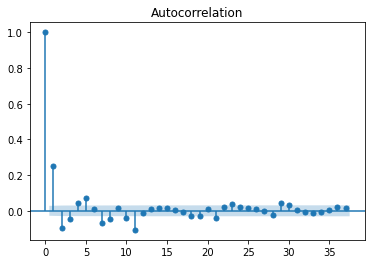

In [79]:
from statsmodels.graphics.tsaplots import plot_acf

returns = df_t['PX_LAST'].pct_change(-1)
print(returns)

plot_acf(returns[:-1]);

In [80]:
data = df_t.shift(-1)
data['returns'] = returns
data['Prev_returns'] = data['returns'].shift(-1)
data = data.dropna()
data

,PX_LAST,PX_VOLUME,PX_LAST_Canada_daily_prod,PX_LAST_Cass_Freight_Rates,PX_LAST_China_GDP,PX_LAST_DAX,PX_LAST_DowJones,PX_LAST_Europe_Inflation,PX_LAST_Europe_IndProd_exConstruction,PX_LAST_Germany_GDP,...,PX_LAST_Russia_Industrial_Production,PX_LAST_Russia_daily_prod,PX_LAST_SPX,PX_LAST_US_GDP,PX_LAST_US_Inflation,PX_LAST_USDEUR,PX_LAST_US_daily_prod,PX_LAST_US_IndProd_Index,returns,Prev_returns
Date,,,,,,,,,,,,,,,,,,,,,
10-29-2021,82.81,491585.0,4121.0,1.184,4.9,15696.33,35730.48,3.4,101.9,2.5,...,6.8,10072.497,4596.42,9.6,5.4,0.8559,11230.181,100.0178,0.009178,0.001815
10-28-2021,82.66,529952.0,4121.0,1.184,4.9,15705.81,35490.69,3.4,101.9,2.5,...,6.8,10072.497,4551.68,9.6,5.4,0.8618,11230.181,100.0178,0.001815,-0.023509
10-27-2021,84.65,467716.0,4121.0,1.184,4.9,15757.06,35756.88,3.4,101.9,2.5,...,6.8,10072.497,4574.79,9.6,5.4,0.8623,11230.181,100.0178,-0.023509,0.010626
10-26-2021,83.76,568725.0,4121.0,1.184,4.9,15599.23,35741.15,3.4,101.9,2.5,...,6.8,10072.497,4566.48,9.6,5.4,0.8613,11230.181,100.0178,0.010626,0.000000
10-25-2021,83.76,465355.0,4121.0,1.184,4.9,15542.98,35677.02,3.4,101.9,2.5,...,6.8,10072.497,4544.90,9.6,5.4,0.8587,11230.181,100.0178,0.000000,0.015273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2002,19.64,72130.0,2091.0,0.937,7.5,4195.95,9007.75,2.6,94.2,1.6,...,3.7,7065.000,948.09,2.2,1.1,1.0137,5873.000,88.6706,0.031568,-0.007078
07-02-2002,19.78,84043.0,2091.0,0.937,7.5,4964.56,10091.87,2.6,94.2,1.6,...,3.7,7065.000,1084.56,2.2,1.1,1.1072,5873.000,88.6706,-0.007078,-0.014449
06-02-2002,20.07,67742.0,2091.0,0.937,7.5,4964.56,10091.87,2.6,94.2,1.6,...,3.7,7065.000,1084.56,2.2,1.1,1.1072,5873.000,88.6706,-0.014449,0.000000


In [ ]:
# data

In [81]:
y = data.loc[:,data.columns.isin(['returns'])]
X = data.loc[:,~data.columns.isin(['returns'])]

In [82]:
y.idxmax(axis=0)

returns    04-22-2020
dtype: object

c:\users\joel\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

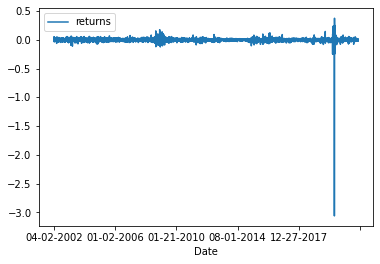

In [87]:
y[::-1].plot()


In [96]:
# !pip install ControlBurn
# !pip install Mosek

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

You should consider upgrading via the 'c:\users\joel\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [97]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)
xTrainScaler = preprocessing.StandardScaler()
xTrain = xTrainScaler.fit_transform(xTrain)
xTrain = pd.DataFrame(xTrain,columns = X.columns)
xTest = preprocessing.StandardScaler().fit_transform(xTest)
xTest = pd.DataFrame(xTest,columns = X.columns)
yTrain = preprocessing.StandardScaler().fit_transform(yTrain.values.reshape(-1, 1))
yTest = preprocessing.StandardScaler().fit_transform(yTest.values.reshape(-1, 1))
yTrain = pd.Series(yTrain.flatten())
yTrain.index = xTrain.index
yTest = pd.Series(yTest.flatten())
yTest.index = xTest.index

In [109]:
# !pip install cmake
!pip install cvxpy
# !pip install cvxopt


  Using cached cvxpy-1.1.15-cp37-cp37m-win_amd64.whl (846 kB)
  Using cached osqp-0.6.2.post0-cp37-cp37m-win_amd64.whl (162 kB)
  Using cached scs-2.1.4.tar.gz (6.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached ecos-2.0.7.post1.tar.gz (126 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached qdldl-0.1.5.post0-cp37-cp37m-win_amd64.whl (75 kB)
  Running setup.py clean for ecos
Failed to build ecos scs


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\joel\appdata\local\programs\python\python37\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Joel\\AppData\\Local\\Temp\\pip-install-vgh4z74c\\ecos_4c051806e295408d8e66c87f08532ebd\\setup.py'"'"'; __file__='"'"'C:\\Users\\Joel\\AppData\\Local\\Temp\\pip-install-vgh4z74c\\ecos_4c051806e295408d8e66c87f08532ebd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Joel\AppData\Local\Temp\pip-wheel-7tdgzjad'
       cwd: C:\Users\Joel\AppData\Local\Temp\pip-install-vgh4z74c\ecos_4c051806e295408d8e66c87f08532ebd\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-

  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Joel\\AppData\\Local\\Temp\\pip-uninstall-eotov52a\\pip.exe'
Consider using the `--user` option or check the permissions.



In [108]:
# !pip install pytest
# !pytest cvxpy/tests

============================= test session starts =============================
platform win32 -- Python 3.7.7, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: C:\Cornell\ORIE 5471 Big Messy Data\Project\ORIE5741_Project
collected 0 items

============================ no tests ran in 0.00s ============================


ERROR: file or directory not found: cvxpy/tests



In [107]:
from ControlBurn.ControlBurn import ControlBurnRegressor

ModuleNotFoundError: No module named 'cvxpy'